# 构建推荐引擎

推荐引擎通常用协同过滤（collaborative filtering）或基于内容的过滤（content-based filtering）来产生一组推荐。协同过滤从当前用户过去的行为和其他用户对当前用户的评分来构建模型，然后使用这个模型来预测这个用户可能感兴趣的内容；而基于内容的过滤用商品本身的特征来给用户推荐更多的商品，商品间的相似度是模型主要的关注点。本次使用协同过滤。

### 1 为数据处理构建函数组合

In [1]:
import numpy as np
from functools import reduce

In [2]:
def add3(input_array):
    return list(map(lambda x: x+3, input_array))

def mul2(input_array):
    return list(map(lambda x: x*2, input_array))

def sub5(input_array):
    return list(map(lambda x: x-5, input_array))

In [3]:
def function_composer(*args):
    return reduce(lambda f, g: lambda x: f(g(x)), args)

In [4]:
arr = np.array([2,5,4,7])
print("\nOperation: add3(mul2(sub5(arr)))")

# 函数组合器
func_composed = function_composer(sub5, mul2, add3)
print("Output using function composition:", func_composed(arr))


Operation: add3(mul2(sub5(arr)))
Output using function composition: [5, 11, 9, 15]


In [5]:
print("\nOperation: sub5(add3(mul2(sub5(mul2(arr)))))\nOutput:",
      function_composer(mul2, sub5, mul2, add3, sub5)(arr))


Operation: sub5(add3(mul2(sub5(mul2(arr)))))
Output: [-10, 2, -2, 10]


### 2 构建机器学习流水线

scikit-learn库中包含了构建机器学习流水线的方法。只需要指定函数，它就会构建一个组合对象，使数据通过整个流水线。这个流水线可以包括诸如预处理、特征选择、监督式学习、非监督式学习等函数。

In [6]:
from sklearn.datasets import samples_generator
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline

In [7]:
# 生成样本数据
X, y = samples_generator.make_classification(n_informative=4, n_features=20, n_redundant=0, random_state=5)

In [8]:
# 特征选择器
selector_k_best = SelectKBest(f_regression, k=10)

In [9]:
# 随机森林分类器
classifier = RandomForestClassifier(n_estimators=50, max_depth=4)

In [10]:
# 构建机器学习流水线
pipeline_classifier = Pipeline([('selector', selector_k_best), ('rf', classifier)])

In [11]:
pipeline_classifier.set_params(selector__k=6, rf__n_estimators=25)

Pipeline(memory=None,
     steps=[('selector', SelectKBest(k=6, score_func=<function f_regression at 0x10b878510>)), ('rf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=No...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [12]:
# 训练分类器
pipeline_classifier.fit(X, y)

Pipeline(memory=None,
     steps=[('selector', SelectKBest(k=6, score_func=<function f_regression at 0x10b878510>)), ('rf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=No...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [13]:
# 预测输出结果
prediction = pipeline_classifier.predict(X)
print("\nPredictions:\n", prediction)


Predictions:
 [1 1 0 1 1 0 0 0 1 1 1 1 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0 1
 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 0 0 1 1 1 0 0 1 0 0 0 1 1 0 0 1
 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 1 0 1 0 1 0 1 1 0 1]


In [14]:
# 打印分类器得分
print("\nScore:", pipeline_classifier.score(X, y))


Score: 0.94


In [15]:
# 打印被分类器选中的特征
features_status = pipeline_classifier.named_steps['selector'].get_support()
selected_features = []
for count, item in enumerate(features_status):
    if item:
        selected_features.append(count)
        
print("\nSelected features (0-indexed):", ', '.join([str(x) for x in selected_features]))


Selected features (0-indexed): 0, 5, 9, 10, 11, 15


### 3 寻找最近邻

最近邻模型是指一个通用算法类，其目的是根据训练数据集中的最近邻数量来做决策。

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

In [18]:
# 输入数据
X = np.array([[1, 1], [1, 3], [2, 2], [2.5, 5], [3, 1], [4, 2], [2, 3.5], [3, 3], [3.5, 4]])

In [19]:
# 寻找最近邻的数量
num_neighbors = 3

In [24]:
# 输入数据点
input_point = [[2.6, 1.7]]

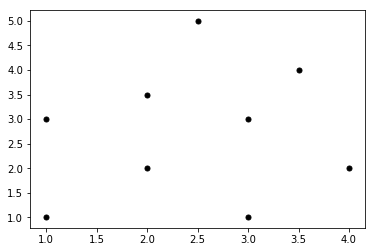

In [21]:
# 画出数据点
plt.figure()
plt.scatter(X[:,0], X[:,1], marker='o', s=25, color='k')

In [22]:
# 建立最近邻模型
knn = NearestNeighbors(n_neighbors=num_neighbors, algorithm='ball_tree').fit(X)

> 为了寻找最近邻，用适合的参数定义一个NearestNeighbors对象，并用输入数据训练该对象

In [25]:
distances, indices = knn.kneighbors(input_point)

In [26]:
# 打印k个最近邻点
print("\nk nearest neighbors")
for rank, index in enumerate(indices[0][:num_neighbors]):
    print(str(rank+1) + " -->", X[index])


k nearest neighbors
1 --> [ 2.  2.]
2 --> [ 3.  1.]
3 --> [ 3.  3.]


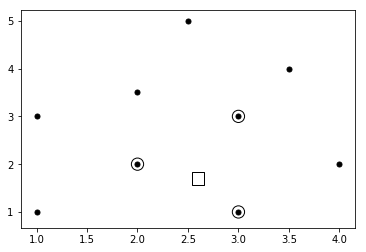

In [32]:
# 画出最近邻点
plt.figure()
plt.scatter(X[:,0], X[:,1], marker='o', s=25, color='k')
plt.scatter(X[indices][0][:][:,0], X[indices][0][:][:,1], marker='o', s=150, color='k', facecolors='none')
plt.scatter(input_point[0][0], input_point[0][1], marker='s', s=150, color='k', facecolors='none')

### 4 构建一个KNN 分类器

KNN（k-nearest neighbors）是用k个最近邻的训练数据集来寻找未知对象分类的一种算法。如果希望找到未知数据点属于哪个类，可以找到KNN并做一个多数表决。

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn import neighbors, datasets

In [34]:
# Load multivar data in the input file
def load_data(input_file):
    X = []
    with open(input_file, 'r') as f:
        for line in f.readlines():
            data = [float(x) for x in line.split(',')]
            X.append(data)

    return np.array(X)

In [35]:
# 加载输入数据
data = load_data('../data/classic/data_nn_classifier.txt')
X, y = data[:,:-1], data[:,-1].astype(np.int)

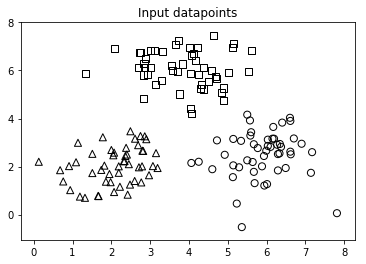

In [36]:
# 画出输入数据
plt.figure()
plt.title('Input datapoints')
markers = '^sov<>hp'
mapper = np.array([markers[i] for i in y])
for i in range(X.shape[0]):
    plt.scatter(X[i, 0], X[i, 1], marker=mapper[i], s=50, edgecolors='black', facecolors='none')

In [37]:
# 设置最近邻的个数
num_neighbors = 10

In [38]:
# 定义网格步长 将边界可视化
h = 0.01

In [39]:
# 创建KNN分类器模型并进行训练
classifier = neighbors.KNeighborsClassifier(num_neighbors, weights='distance')
classifier.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='distance')

In [41]:
# 建立网格来画出边界
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
x_grid, y_grid = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [42]:
# 计算网格中所有点的输出
predicted_values = classifier.predict(np.c_[x_grid.ravel(), y_grid.ravel()])

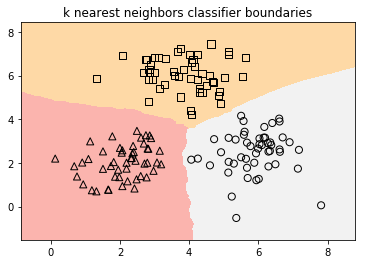

In [45]:
# 在图中画出计算结果
predicted_values = predicted_values.reshape(x_grid.shape)
plt.figure()
plt.pcolormesh(x_grid, y_grid, predicted_values, cmap=cm.Pastel1)

# 在图中画出训练数据点
for i in range(X.shape[0]):
    plt.scatter(X[i, 0], X[i, 1], marker=mapper[i], s=50, edgecolors='black', facecolors='none')

plt.xlim(x_grid.min(), x_grid.max())
plt.ylim(y_grid.min(), y_grid.max())
plt.title('k nearest neighbors classifier boundaries')

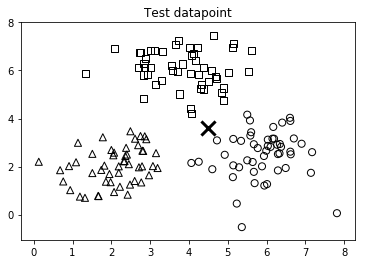

In [48]:
# 测试输入数据点
test_datapoint = [[4.5, 3.6]]
plt.figure()
plt.title('Test datapoint')
for i in range(X.shape[0]):
    plt.scatter(X[i, 0], X[i, 1], marker=mapper[i], s=50, edgecolors='black', facecolors='none')
plt.scatter(test_datapoint[0][0], test_datapoint[0][1], marker='x', linewidth=3, s=200, facecolors='black')

In [49]:
# 提取KNN分类结果
dist, indices = classifier.kneighbors(test_datapoint)

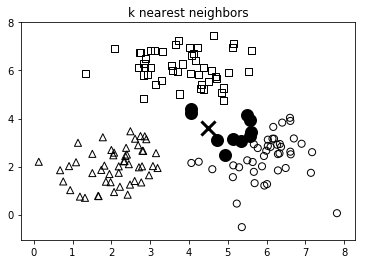

In [51]:
# 画出KNN分类结果
plt.figure()
plt.title('k nearest neighbors')
for i in indices:
    plt.scatter(X[i, 0], X[i, 1], marker='o', linewidth=3, s=100, facecolors='black')
    plt.scatter(test_datapoint[0][0], test_datapoint[0][1], marker='x', linewidth=3, s=200, facecolors='black')
for i in range(X.shape[0]):
    plt.scatter(X[i, 0], X[i, 1], marker=mapper[i], s=50, edgecolors='black', facecolors='none')

In [52]:
print("Predicted output:", classifier.predict(test_datapoint)[0])

Predicted output: 2


> KNN分类器存储了所有可用的数据点，并根据相似度指标来对新的数据点进行分类。这个相似度指标通常以距离函数的形式度量。该算法是一个非参数化技术，也就是说它在进行计算前并不需要找出任何隐含的参数。我们只需要选择k的值。

> 一旦找出KNN，就会做一个多数表决。一个新数据点通过KNN的多数表决来进行分类。这个数据点会被分到和KNN最常见的类中。如果将k的值设置为1，那么这就变成了一个最近邻分类器，在该分类器中，将数据点分类到训练数据集中其最近邻所属的哪一类。

### 5 构建一个KNN 回归器

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors

In [54]:
# 生成样本数据
amplitude = 10
num_points = 100
X = amplitude * np.random.rand(num_points, 1) - 0.5 * amplitude

In [55]:
# 计算目标并添加噪声
y = np.sinc(X).ravel()
y += 0.2 * (0.5 - np.random.rand(y.size))

> 在数据中加入一些噪声来引入一些随机性。加入噪声的目的在于测试算法是否能忽略噪声，并仍然很健壮地运行函数。

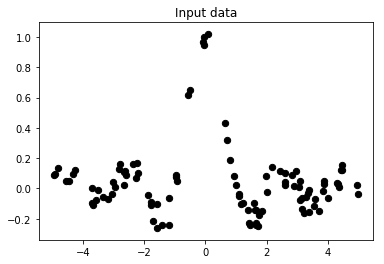

In [56]:
# 画出输入数据图形
plt.figure()
plt.scatter(X, y, s=40, c='k', facecolors='none')
plt.title('Input data')

In [57]:
# 用输入数据10倍的密度创建一维网格
x_values = np.linspace(-0.5*amplitude, 0.5*amplitude, 10*num_points)[:, np.newaxis]

> 定义这个更密集的网格点，因为我们希望针对这些点评价回归器，并查看它和函数的相似程度。

In [58]:
# 定义最近邻的个数
n_neighbors = 8

In [59]:
# 定义并训练回归器
knn_regressor = neighbors.KNeighborsRegressor(n_neighbors, weights='distance')
y_values = knn_regressor.fit(X, y).predict(x_values)

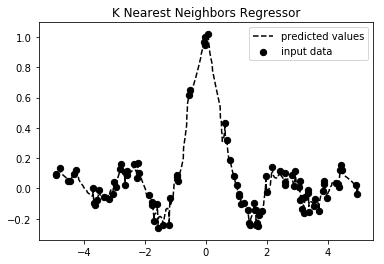

In [63]:
plt.figure()
plt.scatter(X, y, s=40, c='k', facecolors='none', label='input data')
plt.plot(x_values, y_values, c='k', linestyle='--', label='predicted values')
plt.xlim(X.min() - 1, X.max() + 1)
plt.ylim(y.min() - 0.2, y.max() + 0.2)
plt.axis('tight')
plt.legend()
plt.title('K Nearest Neighbors Regressor')